# Analisis Ujaran Kebencian pada Sosial Media Twitter

---

###1- Proses load library atau package yang digunakan

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 21.0 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer


import re,string,unicodedata
from string import punctuation
from wordcloud import WordCloud,STOPWORDS


from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

###2- Proses Load Dataset


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Google Collab/colab/data.csv',encoding="ISO-8859-1")
df.head()

"""Perintah diatas digunakan untuk membaca file berformat csv dari link mounted Google Drive, dengan encoding
ISO-8858-1 kemudian ditampilkan dengan perintah df.head()"""

'Perintah diatas digunakan untuk membaca file berformat csv dari link mounted Google Drive, dengan encoding\nISO-8858-1 kemudian ditampilkan dengan perintah df.head()'

In [ ]:
df.describe()

,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
count,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000,13169.000000
mean,0.422280,0.382945,0.271471,0.150809,0.060217,0.042980,0.024527,0.023236,0.284000,0.256891,0.129471,0.035918
std,0.493941,0.486123,0.444735,0.357876,0.237898,0.202819,0.154685,0.150659,0.450954,0.436935,0.335733,0.186092
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
kamus_alay = pd.read_csv('/content/drive/My Drive/Google Collab/colab/new_kamusalay.csv', encoding='latin-1', header=None)
kamus_alay = kamus_alay.rename(columns={0: 'alay',
                                      1: 'baku'})

"""Perintah diatas merupakan inisiasi untuk membaca kamus alay kemudian perintah beriktutnya
 mengganti kolom dengan indeks terurut menjadi string (dictionary list)"""

kamus_stopword = pd.read_csv('/content/drive/My Drive/Google Collab/colab/stopwordbahasa.csv', header=None)
kamus_stopword = kamus_stopword.rename(columns={0: 'stopword'})


"""Perintah diatas merupakan inisiasi untuk membaca kamus stopword kemudian perintah beriktutnya
 mengganti kolom dengan indeks terurut menjadi string (dictionary list)"""

emoji = pd.read_csv('/content/drive/My Drive/Google Collab/colab/Emoticon.csv', encoding="ISO-8859-1", header=None)
emoji = emoji.rename(columns={0: 'hexa',
                              1: 'arti'})

"""Perintah diatas merupakan inisiasi untuk membaca kamus emoji kemudian perintah beriktutnya
 mengganti kolom dengan indeks terurut menjadi string (dictionary list)"""

kamus_noemoji =  pd.read_csv('/content/drive/My Drive/Google Collab/colab/bytemoaja.csv', encoding='latin-1', header=None)
kamus_noemoji = kamus_noemoji.rename(columns={0: 'byte',
                                      1: 'hapus'})

"""Perintah diatas merupakan inisiasi untuk membaca kamus noemoji kemudian perintah beriktutnya
 mengganti kolom dengan indeks terurut menjadi string (dictionary list)"""

'Perintah diatas merupakan inisiasi untuk membaca kamus noemoji kemudian perintah beriktutnya\n mengganti kolom dengan indeks terurut menjadi string (dictionary list)'

###3- Proses Casefolding

In [ ]:
def casefolding(text):
    return text.lower()

###4- Proses melihat banyak label keputusan

<Axes: ylabel='count'>

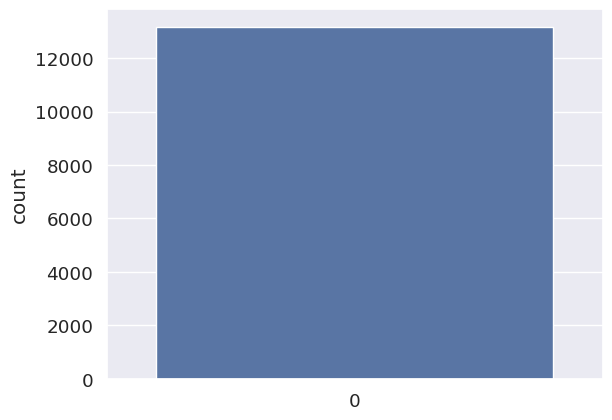

In [ ]:
sns.set(style = 'darkgrid', font_scale = 1.2)
sns.countplot(df.HS)

###5- Mengecek Missing Values ()


In [ ]:
df.isna().sum()

Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

###6- Proses Cleansing

In [ ]:
df['Tweet']

0        - disaat semua cowok berusaha melacak perhatia...
1        RT USER: USER siapa yang telat ngasih tau elu?...
2        41. Kadang aku berfikir, kenapa aku tetap perc...
3        USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4        USER USER Kaum cebong kapir udah keliatan dong...
                               ...                        
13164    USER jangan asal ngomong ndasmu. congor lu yg ...
13165                         USER Kasur mana enak kunyuk'
13166    USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167    USER USER USER USER Bom yang real mudah terdet...
13168    USER Mana situ ngasih(": itu cuma foto ya kuti...
Name: Tweet, Length: 13169, dtype: object

In [ ]:
print("Ukuran: ", kamus_alay.shape)
kamus_alay.head(15)

Ukuran:  (15167, 2)


,alay,baku
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


In [ ]:
print("Ukuran: ", kamus_noemoji.shape)
kamus_noemoji.head(15)

Ukuran:  (15167, 2)


,byte,hapus
0,byte,hapus
1,x23,yang
2,x30,yang
3,x31,yang
4,x32,yang
5,x33,yang
6,x34,yang
7,x35,yang
8,x36,yang
9,x37,yang


In [ ]:
print("Ukuran: ", kamus_stopword.shape)
kamus_stopword.head(15)

Ukuran:  (758, 1)


,stopword
0,ada
1,adalah
2,adanya
3,adapun
4,agak
5,agaknya
6,agar
7,akan
8,akankah
9,akhir


In [ ]:
print("Ukuran: ", emoji.shape)
emoji.head(15)

Ukuran:  (969, 2)


,hexa,arti
0,\xF0\x9F\x80\x84,mahjong merah
1,\xF0\x9F\x83\x8F,kartu joker hitam
2,\xF0\x9F\x85\xB0,golongan darah a
3,\xF0\x9F\x85\xB1,golongan darah b
4,\xF0\x9F\x85\xBE,golongan darah o
5,\xF0\x9F\x86\x91,tombol CL
6,\xF0\x9F\x86\x92,tombol COOL
7,\xF0\x9F\x86\x93,tombol FREE
8,\xF0\x9F\x86\x94,tombol ID
9,\xF0\x9F\x86\x95,tombol NEW


In [ ]:
def hapus_karakter_useless(text):
    text = re.sub('\n',' ',text)
    text = re.sub('rt',' ',text)
    text = re.sub('locator',' ',text)
    text = re.sub('resource',' ',text)
    text = re.sub('user',' ',text)
    text = re.sub('url',' ',text)
    text = re.sub('gue',' ',text)
    text = re.sub('iya',' ',text)
    text = re.sub('amp',' ',text)
    text = re.sub('ya',' ',text)
    text = re.sub('sih',' ',text)
    text = re.sub('pas',' ',text)
    text = re.sub('ng',' ',text)
    text = re.sub('sa',' ',text)
    text = re.sub('rak',' ',text)
    text = re.sub('uniform',' ',text)
    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)
    text = re.sub('  +', ' ', text)
    return text

def hapus_nonalpanumerik(text):
    text = re.sub('[^0-9a-zA-Z]+', ' ', text)
    return text

map_emoji = dict(zip(emoji['hexa'], emoji['arti']))

def convert_emot(text):
    return ' '.join([map_emoji[word] if word in map_emoji else word for word in text.split(' ')])

def cleaning(text):
    text = hapus_nonalpanumerik(text) # 2
    text = hapus_karakter_useless(text) # 2
    return text

print("lowercase: ", casefolding("Halooo, duniaa!"))
print(b'\xF0\x9F\x80\x84'.hex())
print("remove_nonaplhanumeric: ", hapus_nonalpanumerik("Halooo,,,,, duniaa!!"))
print("remove_unnecessary_char: ", hapus_karakter_useless("Hehe\n\n rt USER USER uniform apa kabs www.google.com\n  hehe"))

lowercase:  halooo, duniaa!
f09f8084
remove_nonaplhanumeric:  Halooo duniaa 
remove_unnecessary_char:  Hehe USER USER apa kabs hehe


###7- Proses Normalization

In [ ]:
map_kamus_alay = dict(zip(kamus_alay['alay'], kamus_alay['baku']))

def normalisasi(text):
    return ' '.join([map_kamus_alay[word] if word in map_kamus_alay else word for word in text.split(' ')])

In [ ]:
map_katauseless = dict(zip(kamus_noemoji['byte'], kamus_noemoji['hapus']))


def normalisasinoemoji(text):
    return ' '.join([map_katauseless[word] if word in map_katauseless else word for word in text.split(' ')])

###8- Proses Stopword Removal

In [ ]:
def hapus_stopword(text):
    text = ' '.join(['' if word in kamus_stopword.stopword.values else word for word in text.split(' ')])
    text = re.sub('  +', ' ', text) # Hapus spasi lebih
    text = text.strip()
    return text
print("remove_stopword: ", hapus_stopword("ada hehe adalah huhu yang hehe"))

remove_stopword:  hehe huhu hehe


###9- Proses Stemming
Tahap ini akan menghilangkan suffix dan prefix pada token/kata (reduce inflected), sehingga sebuah kata yang memiliki suffix maupun prefix akan kembali kebentuk dasarnya

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)
print("stemming: ", stemming("Perekonomian Indonesia sedang dalam pertumbuhan yang membanggakan"))

stemming:  ekonomi indonesia sedang dalam tumbuh yang bangga


In [ ]:
def preprocess(text):
    text = casefolding(text) # 1
    text = hapus_nonalpanumerik(text) # 2
    text = hapus_karakter_useless(text) # 2
    text = normalisasi(text) # 3
    text = stemming(text) # 4
    text = normalisasinoemoji(text)#5 no EMOJI
    text = hapus_stopword(text) # 6
    return text

In [ ]:
df['Tweet'] = df['Tweet'].apply(preprocess)

In [ ]:
print (casefolding("Saya suka ngetwit sembarangan, APA masalah buat lo??? :p \xF0\x9F\x80\x84 lo aja gaada temen yang menyeangkan "))

saya suka ngetwit sembarangan, apa masalah buat lo??? :p ð lo aja gaada temen yang menyeangkan 


In [ ]:
print (hapus_nonalpanumerik("Saya suka ngetwit sembarangan, APA masalah buat lo??? :p \xF0\x9F\x80\x84 \xF0\x9F\x80\x84 lo aja gaada temen yang menyeangkan "))

Saya suka ngetwit sembarangan APA masalah buat lo p lo aja gaada temen yang menyeangkan 


In [ ]:
print (hapus_karakter_useless("Saya suka ngetwit sembarangan, APA masalah buat lo??? :p \xF0\x9F\x80\x84 \xF0\x9F\x80\x84 lo aja gaada temen yang menyeangkan "))

Sa suka etwit sembara an, APA ma lah buat lo??? :p ð ð lo aja gaada temen menyea kan 


In [ ]:
print (normalisasi("Saya suka ngetwit sembarangan, APA masalah buat lo??? :p \xF0\x9F\x80\x84 \xF0\x9F\x80\x84 lo aja gaada temen yang menyeangkan "))

Saya suka mentwit sembarangan, APA masalah buat lo??? :p ð ð kamu saja tidak ada teman yang menyeangkan 


In [ ]:
print (stemming("Saya suka ngetwit sembarangan, APA masalah buat lo??? :p \xF0\x9F\x80\x84 \xF0\x9F\x80\x84 lo aja gaada temen yang menyeangkan "))

saya suka ngetwit sembarang apa masalah buat lo p lo aja gaada temen yang menyeangkan


In [ ]:
print (normalisasinoemoji("Saya suka ngetwit sembarangan, APA masalah buat lo??? :p \xF0\x9F\x80\x84 \xF0\x9F\x80\x84 lo aja gaada temen yang menyeangkan "))

Saya suka mentwit sembarangan, APA masalah buat lo??? :p ð ð kamu aja gaada teman yang menyeangkan 


In [ ]:
print (hapus_stopword("Saya suka ngetwit sembarangan, APA masalah buat lo??? :p \xF0\x9F\x80\x84 \xF0\x9F\x80\x84 lo aja gaada temen yang menyeangkan "))

Saya suka ngetwit sembarangan, APA lo??? :p ð ð lo aja gaada temen menyeangkan


In [ ]:
kata = "Saya suka ngetwit sembarangan, APA masalah buat lo??? :p \xF0\x9F\x80\x84 \xF0\x9F\x80\x84 lo aja gaada temen yang menyeangkan"
print(kata)

print(preprocess(kata))

Saya suka ngetwit sembarangan, APA masalah buat lo??? :p ð ð lo aja gaada temen yang menyeangkan
suka etwit sembara an p teman menyea


In [ ]:
df.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,at cowok beru lacak perhati lantas remeh perha...,1,1,1,0,0,0,0,0,1,1,0,0
1,telat a tau edan rap gaul deh an cigax jifla c...,0,1,0,0,0,0,0,0,0,0,0,0
2,41 kada pikir perca tuhan jatuh kali kali kada...,0,0,0,0,0,0,0,0,0,0,0,0
3,ku tau mata sipit lihat,0,0,0,0,0,0,0,0,0,0,0,0
4,kaum cebo kafir lihat do okn do oke haha,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
##export
df.to_csv('dataku.csv')

###Membuat Wordcloud
Pada proses ini, teks akan di representasi menjadi bentuk visual, biasanya digunakan untuk menggambarkan metadata keywords (tags) pada sebuah website/situs, untuk memvisualisasikan suatu bentuk teks secara bebas.

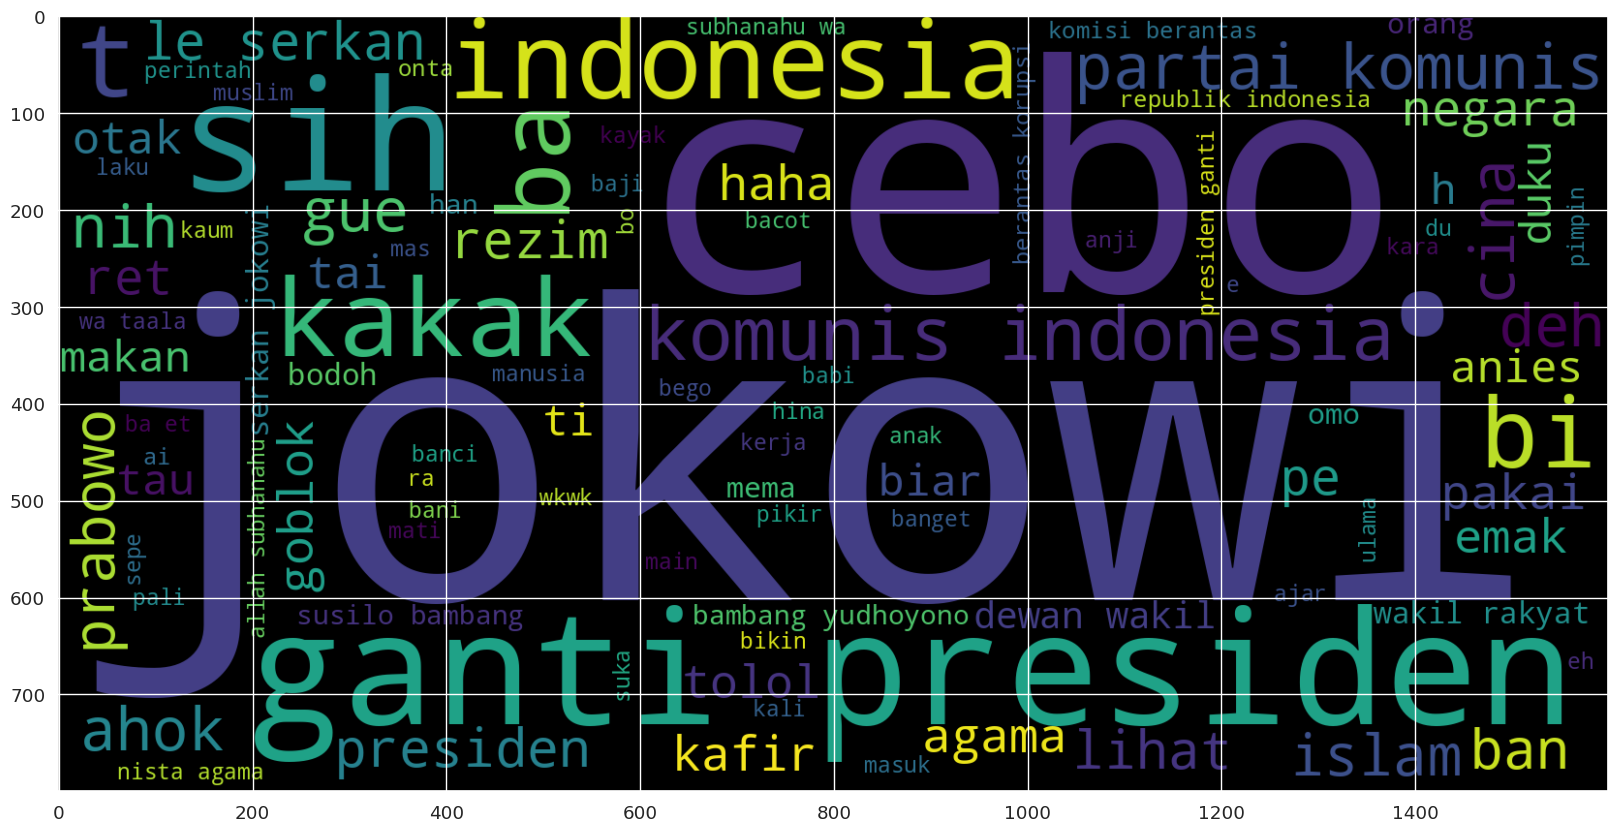

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(df[df.HS == 1].Tweet))
plt.imshow(wc , interpolation = 'bilinear')

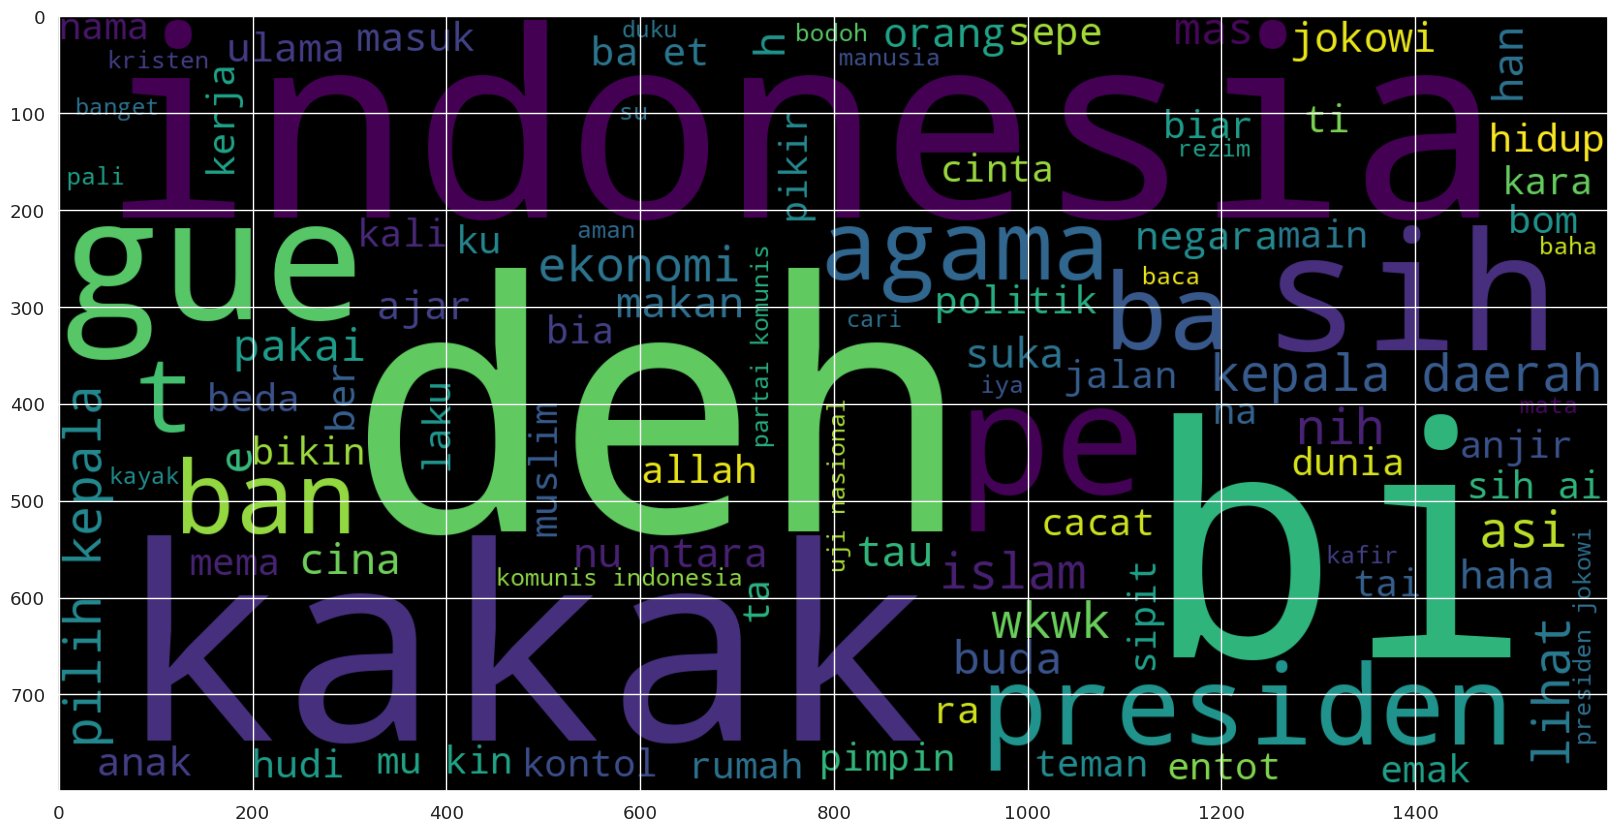

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 100 , width = 1600 , height = 800).generate(" ".join(df[df.HS == 0].Tweet))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
text = df['Tweet'].values.tolist()
label = df['HS'].values

###10- Pembobotan TF-IDF

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
 tfidf_vectorizer = TfidfVectorizer().fit(text)
 tfidf_text = tfidf_vectorizer.transform(text)

tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(text)
result = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
result = result.sort_values('TF-IDF', ascending=False)
result.head(10)

AttributeError: ignored

In [ ]:
tfIdfVectorizer.sum()
tfIdf.sum()


###11- Metode SVM

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_text, label, test_size = 0.3, random_state = 123)

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
model = SVC().fit(X_train,y_train)

In [ ]:
pred_svm = model.predict(X_test)
print(classification_report(pred_svm, y_test))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(pred_svm, y_test)

In [ ]:


import joblib
joblib.dump(model, '/content/drive/My Drive/colab/svm.pkl')

In [ ]:
joblib_model = joblib.load('/content/drive/My Drive/colab/svm.pkl')

###Proses Prediksi

In [ ]:
def prediksi(text):
  text = preprocess(text)
  tfidf_vektor = tfidf_vectorizer.transform([text])
  pred = joblib_model.predict(tfidf_vektor)
  if pred == 1:
    sentimen = 'positif'
  else:
    sentimen = 'negatif'
  return sentimen

In [ ]:
prediksi('bapak kau kaya babi ngepet bangsat')

In [ ]:
prediksi('Pada suatu hari kita pergi ke pasar')